In [236]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import torch

In [237]:
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

In [238]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
           'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
df = pd.read_csv('adult.data', names = columns)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [239]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


In [240]:
print(df.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [241]:
for column in df.columns:
    unique_vals = df[column].nunique(dropna=False)
    print(f"Column: {column} has {unique_vals} unique values.")
    print(df[column].unique())
    print("\n")

Column: age has 73 unique values.
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]


Column: workclass has 9 unique values.
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']


Column: fnlwgt has 21648 unique values.
[ 77516  83311 215646 ...  34066  84661 257302]


Column: education has 16 unique values.
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']


Column: education-num has 16 unique values.
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


Column: marital-status has 7 unique values.
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' '

In [242]:
df.replace(' ?', np.nan, inplace=True)
df.dropna(inplace=True)
df_encoded = pd.get_dummies(df, drop_first=True)
print(df_encoded)

       age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0       39   77516             13          2174             0              40   
1       50   83311             13             0             0              13   
2       38  215646              9             0             0              40   
3       53  234721              7             0             0              40   
4       28  338409             13             0             0              40   
...    ...     ...            ...           ...           ...             ...   
32556   27  257302             12             0             0              38   
32557   40  154374              9             0             0              40   
32558   58  151910              9             0             0              40   
32559   22  201490              9             0             0              20   
32560   52  287927              9         15024             0              40   

       workclass_ Local-gov

In [243]:
# Features and target variable
X_train = df_encoded.drop(columns=['income_ >50K'])
y_train = df_encoded['income_ >50K']

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Convert to PyTorch tensors for training set
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)


In [244]:
# Define neural network model
class IncomeClassifier(torch.nn.Module):
    def __init__(self, input_dim):
        super(IncomeClassifier, self).__init__()
        self.fc1 = torch.nn.Linear(input_dim, 64)
        self.fc2 = torch.nn.Linear(64, 32)
        self.fc3 = torch.nn.Linear(32, 1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

# Instantiate model
input_dim = X_train_tensor.shape[1]
model = IncomeClassifier(input_dim)
# Loss function and optimizer
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.015, momentum=0.9)


In [245]:
# Load the test set (adult.test)
test_file_path = 'adult.test'
df_test = pd.read_csv(test_file_path, names=columns, skiprows=1)
df_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [246]:
# Clean the test dataset
df_test.replace(' ?', np.nan, inplace=True)
df_test.dropna(inplace=True)

# Encode categorical values in the test set
df_test_encoded = pd.get_dummies(df_test, drop_first=True)

# Ensure test set has the same columns as the training set
missing_cols = set(df_encoded.columns) - set(df_test_encoded.columns)
for col in missing_cols:
    df_test_encoded[col] = 0

In [247]:
# Ensure column order matches the training set
X_test = df_test_encoded[X_train.columns]

# Target variable for the test set
y_test = df_test['income'].apply(lambda x: 1 if x.strip() == '>50K.' else 0)

# Standardize the test set features
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors for the test set
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [248]:
def binary_accuracy(y_pred, y_true):
    y_pred_tag = torch.round(y_pred)
    correct_results_sum = (y_pred_tag == y_true).sum().float()
    acc = correct_results_sum / y_true.shape[0]
    return acc

In [249]:
# Training the model
epochs = 800
for epoch in range(epochs):
    model.train()
    y_pred_train = model(X_train_tensor)
    train_loss = criterion(y_pred_train, y_train_tensor)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Calculate training accuracy
    train_acc = binary_accuracy(y_pred_train, y_train_tensor)

    # Evaluate the model on the test set
    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test_tensor)
        test_acc = binary_accuracy(y_pred_test, y_test_tensor)

    # Print both training and test accuracy for each epoch
    print(f'Epoch {epoch + 1}/{epochs}, '
          f'Train Loss: {train_loss.item():.4f}, Train Acc: {train_acc.item() * 100:.2f}%, '
          f'Test Acc: {test_acc.item() * 100:.2f}%')

Epoch 1/800, Train Loss: 0.7201, Train Acc: 27.01%, Test Acc: 27.26%
Epoch 2/800, Train Loss: 0.7179, Train Acc: 27.44%, Test Acc: 28.11%
Epoch 3/800, Train Loss: 0.7139, Train Acc: 28.44%, Test Acc: 30.82%
Epoch 4/800, Train Loss: 0.7084, Train Acc: 30.72%, Test Acc: 35.74%
Epoch 5/800, Train Loss: 0.7016, Train Acc: 35.63%, Test Acc: 46.02%
Epoch 6/800, Train Loss: 0.6938, Train Acc: 46.00%, Test Acc: 61.62%
Epoch 7/800, Train Loss: 0.6852, Train Acc: 61.68%, Test Acc: 70.90%
Epoch 8/800, Train Loss: 0.6762, Train Acc: 71.19%, Test Acc: 74.60%
Epoch 9/800, Train Loss: 0.6669, Train Acc: 74.37%, Test Acc: 75.23%
Epoch 10/800, Train Loss: 0.6576, Train Acc: 74.96%, Test Acc: 75.40%
Epoch 11/800, Train Loss: 0.6483, Train Acc: 75.07%, Test Acc: 75.42%
Epoch 12/800, Train Loss: 0.6392, Train Acc: 75.11%, Test Acc: 75.43%
Epoch 13/800, Train Loss: 0.6303, Train Acc: 75.11%, Test Acc: 75.43%
Epoch 14/800, Train Loss: 0.6219, Train Acc: 75.11%, Test Acc: 75.43%
Epoch 15/800, Train Loss: 0.6

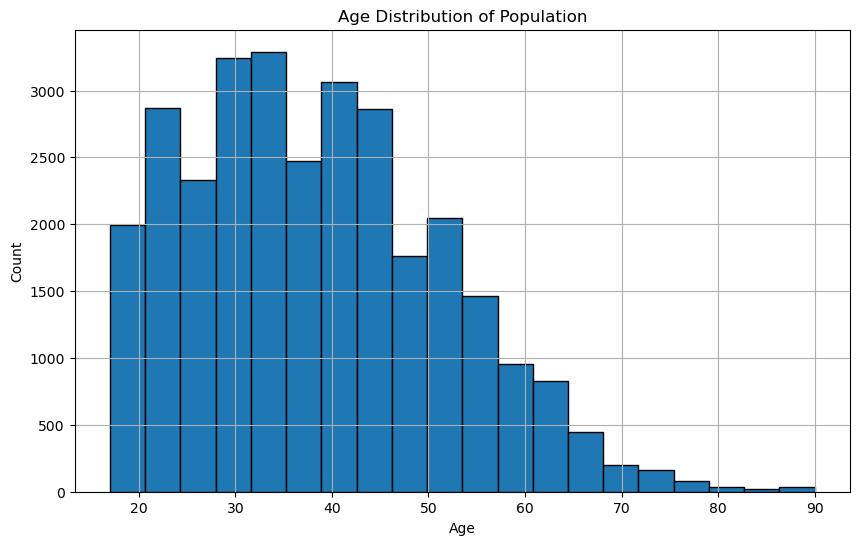

In [250]:
# 4. Explore the data with bar plots
import matplotlib.pyplot as plt

# Distribution by age
plt.figure(figsize=(10, 6))
df['age'].hist(bins=20, edgecolor='black')
plt.title('Age Distribution of Population')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<Figure size 1000x600 with 0 Axes>

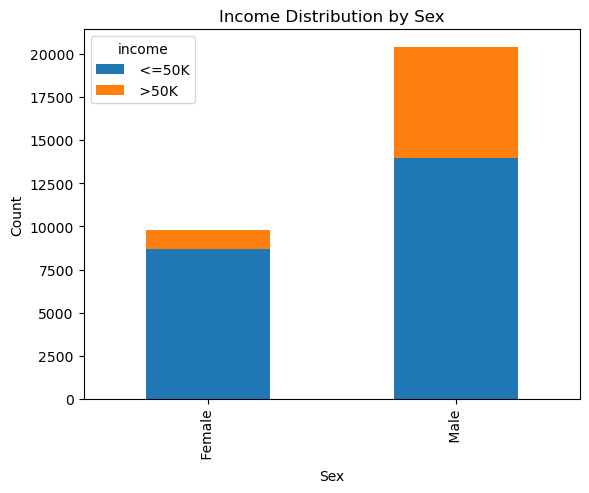

In [251]:
plt.figure(figsize=(10, 6))
df.groupby('sex')['income'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.title('Income Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

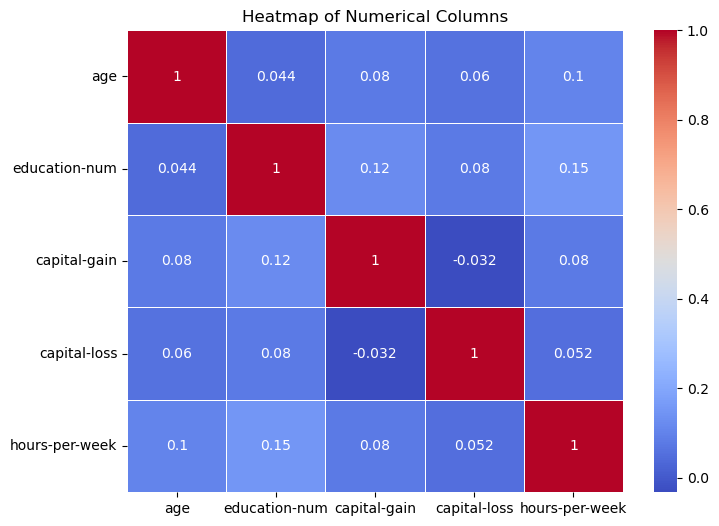

In [252]:
import seaborn as sns

#to plot a Heat-Map
numerical_columns = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df_numerical = df[numerical_columns]
corr_matrix = df_numerical.corr()

# Generate a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Numerical Columns')
plt.show()